In [1]:
import pandas as pd 

import seaborn as sns
import matplotlib.pyplot as plt
sns.set_theme(style="whitegrid")

In [77]:
sns.set(rc={'figure.figsize':(21,8)})
sns.set(style='white')

In [8]:
def to_float(r):
    try:
        return float(r)
    except:
        return 0

In [103]:
apvo = pd.read_csv('../data/prep/apvo_dataset.csv')
ssps = pd.read_csv('../data/prep/ssps_dataset.csv')

In [126]:
dataset = apvo.merge(ssps, on=['date', 'machine_type', 'machine_number'], how='inner')
dataset['month'] = dataset['date'].values.astype('datetime64[M]')
data_m = dataset[(dataset.mesure == 'м') & (dataset.value > 0)]

In [127]:
data_m = data_m.sort_values(by='date')

In [128]:
data_m.rate_norm = data_m.rate_norm.apply(to_float)
data_m.rate_fact = data_m.rate_fact.apply(to_float)
data_m.low_rate = data_m.low_rate.apply(to_float)
data_m.up_rate = data_m.up_rate.apply(to_float)
data_m.residue = data_m.residue.apply(to_float)
data_m['ratio'] = data_m.rate_fact / data_m.value

In [129]:
def plot_rate_fact(data, machine_type, date, y_value="rate_fact"):
    df = data[(data.machine_type == machine_type) & (data.date > date)]
    ax = sns.lineplot(data=df, x="date", y=y_value)

    ax.yaxis.tick_right()
    
    ax2 = ax.twinx()
    sns.lineplot(data=df, x="date", y='ratio', ax=ax2, color='#EF9A9A')
    ax2.set(xlabel='', ylabel='Плотность расходов на метр в сутки')

    ax.set_title("Фактический расход топлива y серии {}".format(machine_type), fontsize=15)
    ax.set(xlabel='', ylabel='Валовый расход в сутки')
    
    plt.gca().xaxis.set_major_locator(plt.MaxNLocator(10))

    ax.grid(True)

    plt.savefig("output.png")

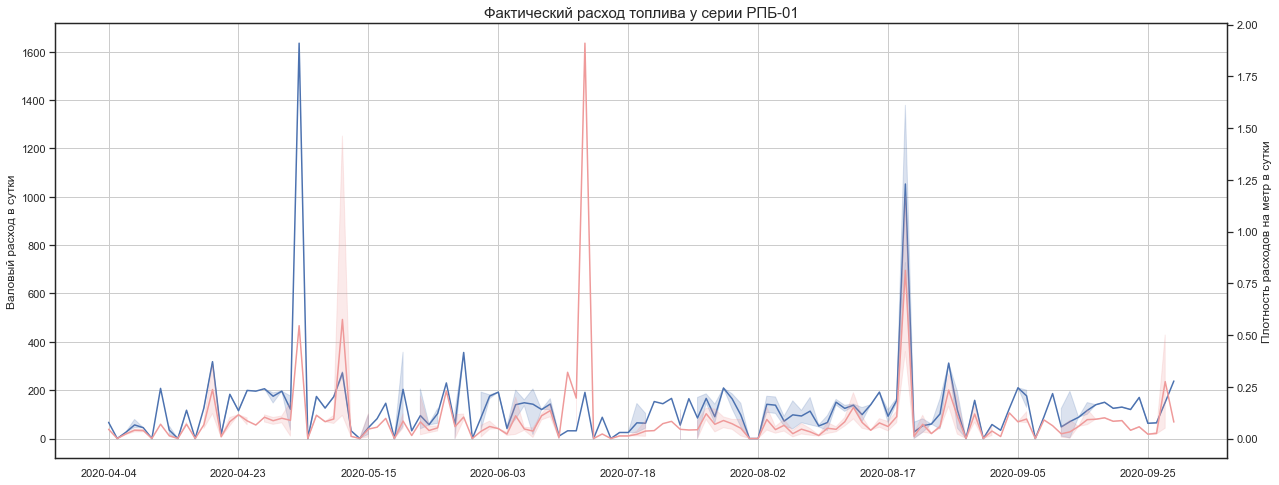

In [130]:
plot_rate_fact(data_m, 'РПБ-01', '2020-04-01')

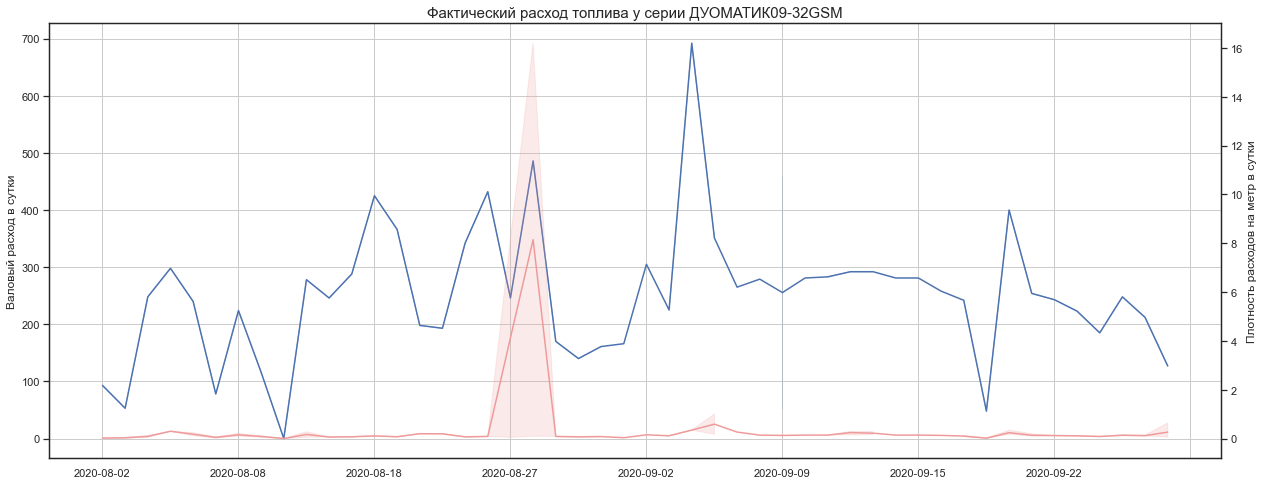

In [138]:
plot_rate_fact(data_m, 'ДУОМАТИК09-32GSM', '2020-08-01')

In [134]:
dims = data_m.groupby(by=['machine_type']).mean()[['rate_fact', 'ratio']].reset_index()

In [136]:
dims.to_csv('../api/tmp/cashes/data/dims.csv', index=False)

In [140]:
data_m.to_csv('../api/tmp/cashes/data/data_m.csv', index=False)

In [108]:
data_m['machine_type'].value_counts()

ДУОМАТИК09-32GSM    735
РПБ-01              633
ЩОМ-1200М           197
ПМГ                 184
ПМГ-1М              131
ДСП-С6              117
ЩОМ-700              50
ЩОМ-1600Т            32
ПУМА2012             19
ЩОМ-1200             18
СМ-2                 11
ВПО-3000              6
СПП-16                3
ЭЛБ-4С                2
ЭЛБ-3                 2
ЭЛБ-4                 1
СМ-2Б                 1
СМ-2М                 1
Name: machine_type, dtype: int64

In [98]:
columns_map = {
    "date": "Дата работ",
    "machine_type": "Серия машины",
    "value": "Вып. объем физич.",
    "company_y": "Предприятие",
    "au12": "АУ-12",
    "rate_norm": "Расход топлива по норме",
    "rate_fact": "Расход топлива по фактический",
    "low_rate": "Экономия",
    "up_rate": "Перерасход",
    "residue": "Остаток в баках на конец периода"
}